<a href="https://colab.research.google.com/github/olivia2510-ui/Optimal-Portfolio-Analysis/blob/main/%EA%B8%88%EC%9C%B5%ED%86%B5%EA%B3%84_20231275_%EC%8B%A0%EB%AF%BC%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install yfinance
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import yfinance as yf
import pandas as pd

# 종목 코드와 이름
tickers = ['097950.KQ', '007310.KS', '017810.KQ']
names = ['CJ제일제당', '오뚜기', '풀무원']

# 기간 설정
start = '2023-11-01'
end = '2024-05-26'

# 데이터 리스트 초기화
data_list = []

for t, n in zip(tickers, names):
    df = yf.download(t, start=start, end=end)

    # 'Close' 가격만 추출
    if isinstance(df.columns, pd.MultiIndex):
        df = df.xs('Close', axis=1, level=0)

    df = df.to_frame(name='Close') if isinstance(df, pd.Series) else df
    df.columns = ['Close']
    df['Company'] = n
    df['Date'] = df.index
    df.reset_index(drop=True, inplace=True)
    data_list.append(df)

# 데이터 합치기
all_data = pd.concat(data_list, ignore_index=True)

# 피벗 테이블 만들기 (날짜별 기업별 종가)
pivot_df = all_data.pivot(index='Date', columns='Company', values='Close')

# 결측치 제거
pivot_df.dropna(inplace=True)

# 엑셀로 저장
pivot_df.to_excel('C:/work/주가_6개월.xlsx')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#일간 수익률 계산
returns = pivot_df.pct_change().dropna()
returns

Company,CJ제일제당,오뚜기,풀무원
Date,,,
2023-11-02,-0.006920,-0.016688,0.005958
2023-11-03,0.008711,0.013055,0.000987
2023-11-06,0.034542,-0.010309,0.004931
2023-11-07,-0.016694,-0.014323,0.007851
2023-11-08,0.023769,0.002642,-0.007790
...,...,...,...
2024-05-20,0.025487,0.004430,-0.023256
2024-05-21,-0.008772,-0.007718,0.011161
2024-05-22,0.044248,0.000000,0.025754


In [ ]:
#수익률 통계 요약
mean_returns = returns.mean()
mean_returns

Company
CJ제일제당    0.001894
오뚜기       0.001233
풀무원       0.003664
dtype: float64

In [ ]:
std_returns = returns.std()
std_returns

Company
CJ제일제당    0.016963
오뚜기       0.013213
풀무원       0.022379
dtype: float64

In [ ]:
cov_matrix = returns.cov()
cov_matrix

Company,CJ제일제당,오뚜기,풀무원
Company,,,
CJ제일제당,0.000288,0.000070,0.000138
오뚜기,0.000070,0.000175,0.000085
풀무원,0.000138,0.000085,0.000501


In [ ]:
corr_matrix = returns.corr()
corr_matrix

Company,CJ제일제당,오뚜기,풀무원
Company,,,
CJ제일제당,1.000000,0.312538,0.363255
오뚜기,0.312538,1.000000,0.288815
풀무원,0.363255,0.288815,1.000000


In [ ]:
weights_1 = [1/3, 1/3, 1/3]
weights_2 = [1/2, 1/4, 1/4]
weights_3 = [1/4, 1/2, 1/4]
weights_4 = [1/4, 1/4, 1/2]

In [ ]:
portfolio_return_1 = (returns @ weights_1).mean()
portfolio_return_1

0.0022639112289717916

In [ ]:
portfolio_risk_1 = (returns @ weights_1).std()
portfolio_risk_1

0.013122575301507507

In [ ]:
portfolio_return_2 = (returns @ weights_2).mean()
portfolio_return_2

0.002171463658138035

In [ ]:
portfolio_risk_2 = (returns @ weights_2).std()
portfolio_risk_2

0.013296990024924418

In [ ]:
portfolio_return_3 = (returns @ weights_3).mean()
portfolio_return_3

0.002006294683933119

In [ ]:
portfolio_risk_3 = (returns @ weights_3).std()
portfolio_risk_3

0.012207632911949593

In [ ]:
portfolio_return_4 = (returns @ weights_4).mean()
portfolio_return_4

0.0026139753448442206

In [ ]:
portfolio_risk_4 = (returns @ weights_4).std()
portfolio_risk_4

0.014787751725954423

In [ ]:
import numpy as np
import pandas as pd

# 예시: 100일 동안 4개 종목의 수익률 데이터 생성
returns = pd.DataFrame(np.random.randn(100, 4) * 0.01)

# 0.1 간격의 가중치 조합 생성 (w1 + w2 + w3 = 1)
weight_range = np.arange(0, 1.1, 0.1)
valid_weights = []

for w1 in weight_range:
    for w2 in weight_range:
        w3 = 1 - w1 - w2
        if 0 <= w3 <= 1:
            valid_weights.append([w1, w2, w3])

# 무위험 수익률 설정 (연 3% → 일일 기준)
risk_free_rate_annual = 0.03
risk_free_rate_daily = risk_free_rate_annual / 252

returns = returns.iloc[:, :3]  # 앞에서 3개 종목만 사용

# 샤프 비율 계산
for i, weights in enumerate(valid_weights):
    weights = np.array(weights)
    portfolio_returns = returns @ weights
    ret = portfolio_returns.mean()
    risk = portfolio_returns.std()
    sharpe = (ret - risk_free_rate_daily) / risk

    if sharpe > 0.1:
        print(f"조합 {i:2d} → Weights: {weights}, Sharpe: {sharpe:.4f}")

조합 13 → Weights: [0.1 0.2 0.7], Sharpe: 0.1011
조합 14 → Weights: [0.1 0.3 0.6], Sharpe: 0.1094
조합 15 → Weights: [0.1 0.4 0.5], Sharpe: 0.1145
조합 16 → Weights: [0.1 0.5 0.4], Sharpe: 0.1146
조합 17 → Weights: [0.1 0.6 0.3], Sharpe: 0.1097
조합 18 → Weights: [0.1 0.7 0.2], Sharpe: 0.1015
조합 22 → Weights: [0.2 0.1 0.7], Sharpe: 0.1104
조합 23 → Weights: [0.2 0.2 0.6], Sharpe: 0.1213
조합 24 → Weights: [0.2 0.3 0.5], Sharpe: 0.1294
조합 25 → Weights: [0.2 0.4 0.4], Sharpe: 0.1324
조합 26 → Weights: [0.2 0.5 0.3], Sharpe: 0.1291
조합 27 → Weights: [0.2 0.6 0.2], Sharpe: 0.1207
조합 28 → Weights: [0.2 0.7 0.1], Sharpe: 0.1098
조합 30 → Weights: [0.3 0.  0.7], Sharpe: 0.1159
조합 31 → Weights: [0.3 0.1 0.6], Sharpe: 0.1281
조합 32 → Weights: [0.3 0.2 0.5], Sharpe: 0.1386
조합 33 → Weights: [0.3 0.3 0.4], Sharpe: 0.1447
조합 34 → Weights: [0.3 0.4 0.3], Sharpe: 0.1441
조합 35 → Weights: [0.3 0.5 0.2], Sharpe: 0.1372
조합 36 → Weights: [0.3 0.6 0.1], Sharpe: 0.1263
조합 37 → Weights: [0.4 0.  0.6], Sharpe: 0.1304
조합 38 → Weigh

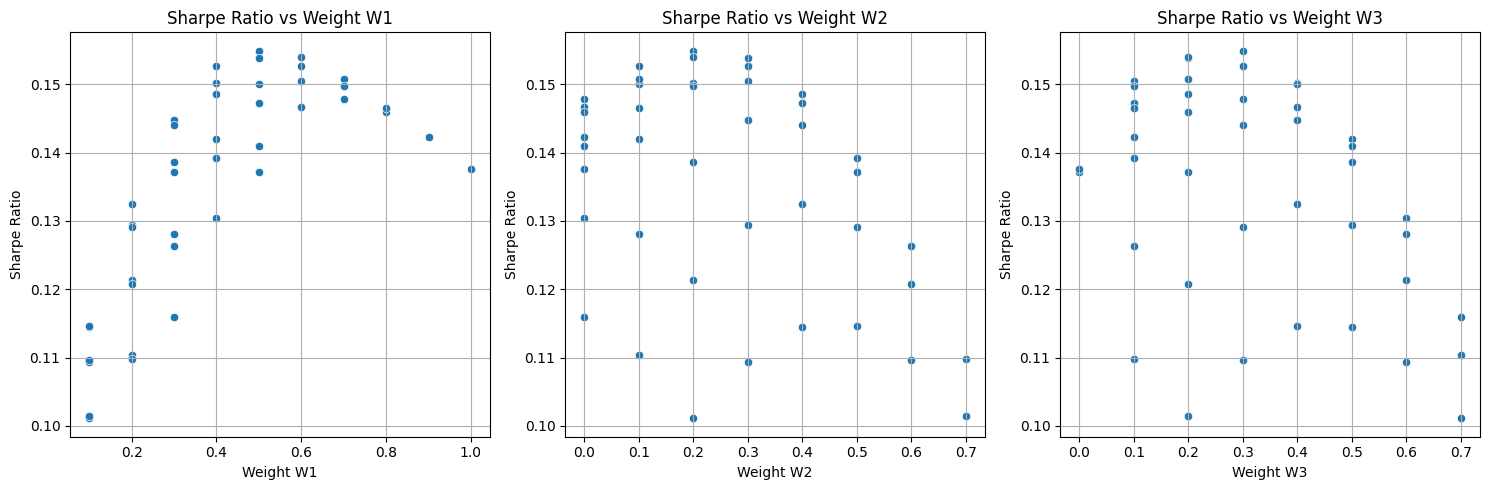

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 샤프 비율과 가중치 조합 데이터
data = [
    ([0.1, 0.2, 0.7], 0.1011),
    ([0.1, 0.3, 0.6], 0.1094),
    ([0.1, 0.4, 0.5], 0.1145),
    ([0.1, 0.5, 0.4], 0.1146),
    ([0.1, 0.6, 0.3], 0.1097),
    ([0.1, 0.7, 0.2], 0.1015),
    ([0.2, 0.1, 0.7], 0.1104),
    ([0.2, 0.2, 0.6], 0.1213),
    ([0.2, 0.3, 0.5], 0.1294),
    ([0.2, 0.4, 0.4], 0.1324),
    ([0.2, 0.5, 0.3], 0.1291),
    ([0.2, 0.6, 0.2], 0.1207),
    ([0.2, 0.7, 0.1], 0.1098),
    ([0.3, 0.0, 0.7], 0.1159),
    ([0.3, 0.1, 0.6], 0.1281),
    ([0.3, 0.2, 0.5], 0.1386),
    ([0.3, 0.3, 0.4], 0.1447),
    ([0.3, 0.4, 0.3], 0.1441),
    ([0.3, 0.5, 0.2], 0.1372),
    ([0.3, 0.6, 0.1], 0.1263),
    ([0.4, 0.0, 0.6], 0.1304),
    ([0.4, 0.1, 0.5], 0.1420),
    ([0.4, 0.2, 0.4], 0.1502),
    ([0.4, 0.3, 0.3], 0.1527),
    ([0.4, 0.4, 0.2], 0.1486),
    ([0.4, 0.5, 0.1], 0.1392),
    ([0.5, 0.0, 0.5], 0.1410),
    ([0.5, 0.1, 0.4], 0.1501),
    ([0.5, 0.2, 0.3], 0.1549),
    ([0.5, 0.3, 0.2], 0.1538),
    ([0.5, 0.4, 0.1], 0.1473),
    ([0.5, 0.5, 0.0], 0.1372),
    ([0.6, 0.0, 0.4], 0.1466),
    ([0.6, 0.1, 0.3], 0.1526),
    ([0.6, 0.2, 0.2], 0.1540),
    ([0.6, 0.3, 0.1], 0.1504),
    ([0.7, 0.0, 0.3], 0.1479),
    ([0.7, 0.1, 0.2], 0.1508),
    ([0.7, 0.2, 0.1], 0.1497),
    ([0.8, 0.0, 0.2], 0.1459),
    ([0.8, 0.1, 0.1], 0.1465),
    ([0.9, 0.0, 0.1], 0.1422),
    ([1.0, 0.0, 0.0], 0.1376)
]

# DataFrame 만들기
df = pd.DataFrame(data, columns=['Weights', 'Sharpe'])

# 가중치 분리
df[['w1', 'w2', 'w3']] = pd.DataFrame(df['Weights'].tolist(), index=df.index)

# 시각화
plt.figure(figsize=(15, 5))

for i, col in enumerate(['w1', 'w2', 'w3'], 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=col, y='Sharpe')
    plt.title(f'Sharpe Ratio vs Weight {col.upper()}')
    plt.xlabel(f'Weight {col.upper()}')
    plt.ylabel('Sharpe Ratio')
    plt.grid(True)

plt.tight_layout()
plt.show()

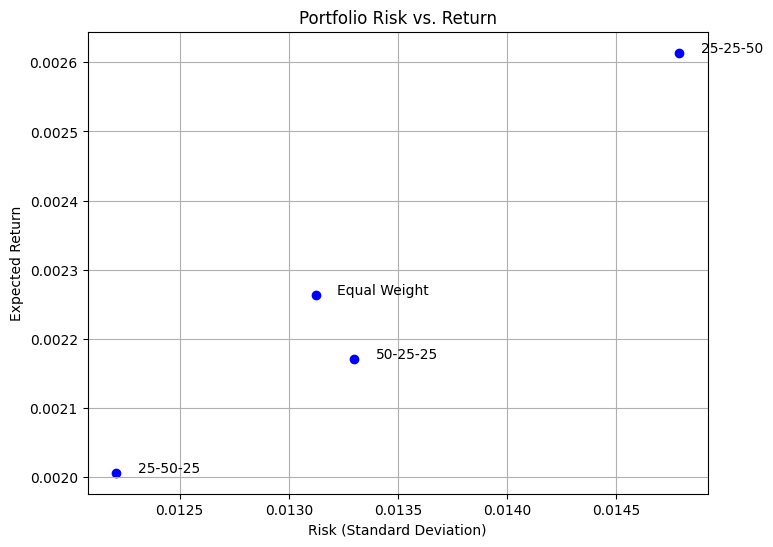

In [ ]:
import matplotlib.pyplot as plt

returns = [portfolio_return_1, portfolio_return_2, portfolio_return_3, portfolio_return_4]
risks = [portfolio_risk_1, portfolio_risk_2, portfolio_risk_3, portfolio_risk_4]
labels = ['Equal Weight', '50-25-25', '25-50-25', '25-25-50']

plt.figure(figsize=(8, 6))
plt.scatter(risks, returns, c='blue')
for i, label in enumerate(labels):
    plt.text(risks[i]+0.0001, returns[i], label)

plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Portfolio Risk vs. Return')
plt.grid(True)
plt.show()

In [ ]:
# 필요하면 예: 0.0005
risk_free_rate = 0

# 샤프 비율 계산
sharpe_ratios = [(r - risk_free_rate) / s for r, s in zip(returns, risks)]

# 결과 출력
for label, sharpe in zip(labels, sharpe_ratios):
    print(f"{label}: Sharpe Ratio = {sharpe:.4f}")

Equal Weight: Sharpe Ratio = 0.1725
50-25-25: Sharpe Ratio = 0.1633
25-50-25: Sharpe Ratio = 0.1643
25-25-50: Sharpe Ratio = 0.1768
